In [1]:
# !kaggle datasets download -d mnpinto/pneumotorax256
# delete the duplicate data after unzipping

In [2]:
from fastai.vision import *

In [3]:
path = Path('./data256')

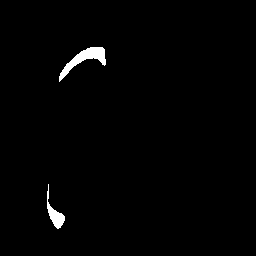

In [4]:
img = open_image('data256/masks/1.2.276.0.7230010.3.1.4.8323329.3678.1517875178.953520.png')
img

In [7]:
def my_open(self, fn):
    return open_mask(fn, after_open=self.after_open, div=True)

SegmentationLabelList.open = my_open

In [8]:
data = (SegmentationItemList.from_folder(path='./data256/train')
        .split_by_rand_pct(0.2)
        .label_from_func(lambda x : str(x).replace('train', 'masks'), classes=[0, 1])
        .transform(get_transforms(), size=256, tfm_y=True)
        .databunch(path=Path('.'), bs=16)
        .normalize(imagenet_stats))

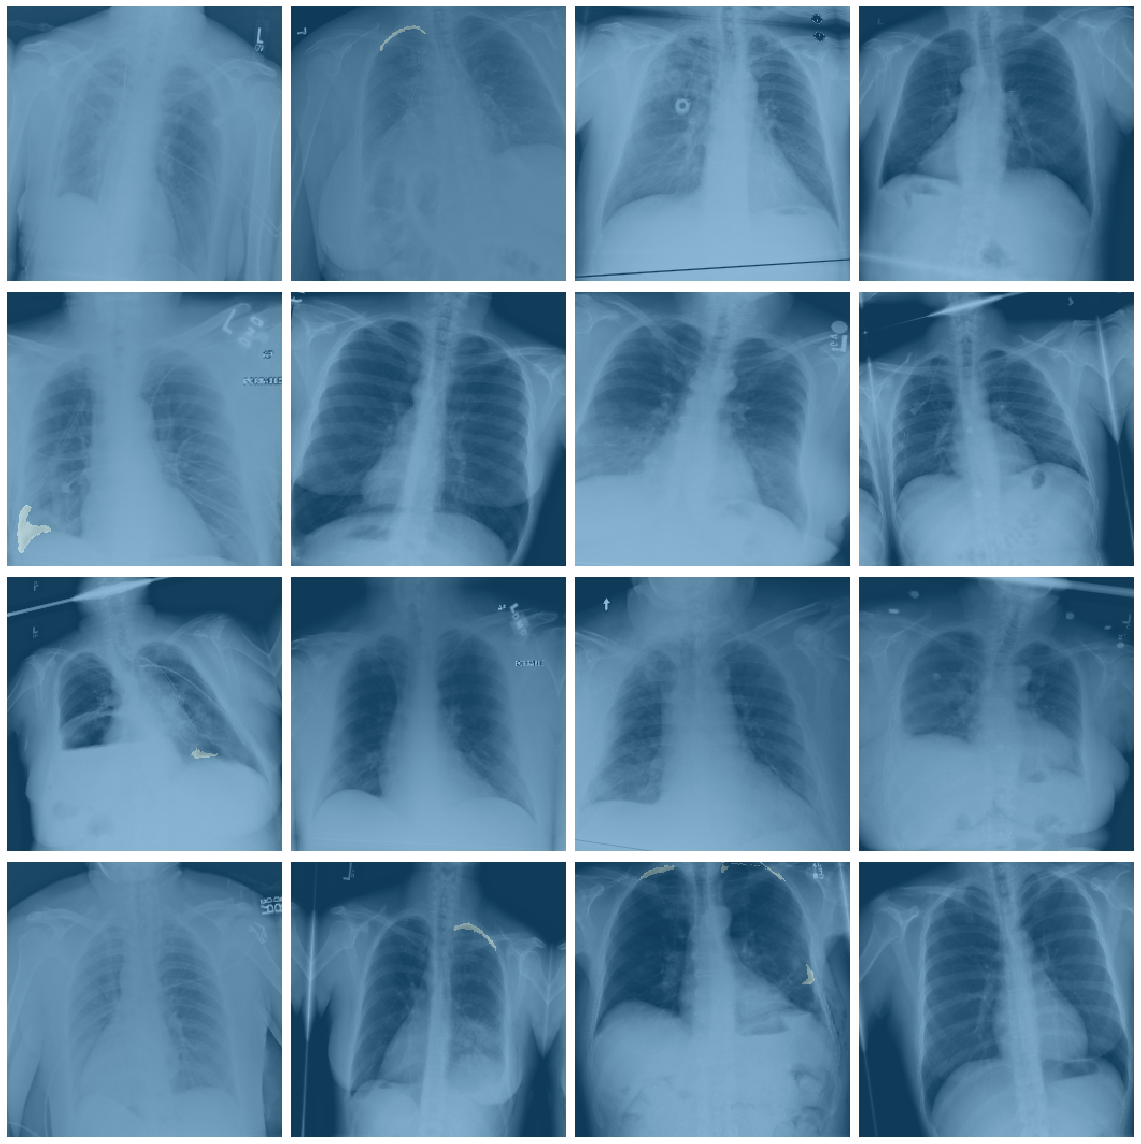

In [9]:
data.show_batch()

In [10]:
learn = unet_learner(data, models.resnet34, metrics=[dice])

In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,dice,time
0,0.021410,0.017065,0.761905,02:39
1,0.017613,0.016557,0.761905,02:36
2,0.015190,0.014916,0.761905,02:37
3,0.013931,0.012428,0.759449,02:37
4,0.011151,0.012184,0.760909,02:37


epoch,train_loss,valid_loss,dice,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


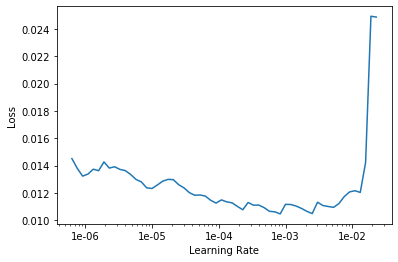

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.unfreeze()
lr = 1e-3
learn.fit_one_cycle(5, slice(lr/30, lr))

epoch,train_loss,valid_loss,dice,time
0,0.012221,0.012430,0.758629,02:41
1,0.011907,0.013124,0.762201,02:44
2,0.011465,0.010887,0.764643,02:45
3,0.009872,0.010441,0.765045,02:46
4,0.009986,0.010132,0.763278,02:46
